In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ema_workbench import (Model, Policy, ema_logging, 
                           MultiprocessingEvaluator, save_results)

from problem_formulation import get_model_for_problem_formulation

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [4]:
import copy
    
uncertainties = copy.deepcopy(dike_model.uncertainties)

In [10]:
def get_do_nothing_dict():
    return {l.name:0 for l in dike_model.levers}    
    
policies = [Policy("base case", **{l.name:0 for l in dike_model.levers}),
            Policy("only heighting", **dict(get_do_nothing_dict(), 
                                            **{'A.1_DikeIncrease 0':5,
                                              'A.1_DikeIncrease 1':5,
                                              'A.1_DikeIncrease 2':5,
                                              'A.2_DikeIncrease 0':5,
                                              'A.2_DikeIncrease 1':5,
                                              'A.2_DikeIncrease 2':5,
                                              'A.3_DikeIncrease 0':5,
                                              'A.3_DikeIncrease 1':5,
                                              'A.3_DikeIncrease 2':5,
                                              'A.4_DikeIncrease 0':5,
                                              'A.4_DikeIncrease 1':5,
                                              'A.4_DikeIncrease 2':5,
                                              'A.5_DikeIncrease 0':5,
                                              'A.5_DikeIncrease 1':5,
                                              'A.5_DikeIncrease 2':5})),
            Policy("only RfR", **dict(get_do_nothing_dict(), 
                                      **{'0_RfR 0':1,
                                         '0_RfR 1':1,
                                         '0_RfR 2':1,
                                         '1_RfR 0':1,
                                         '1_RfR 1':1,
                                         '1_RfR 2':1,
                                         '2_RfR 0':1,
                                         '2_RfR 1':1,
                                         '2_RfR 2':1,
                                         '3_RfR 0':1,
                                         '3_RfR 1':1,
                                         '3_RfR 2':1,
                                         '4_RfR 0':1,
                                         '4_RfR 1':1,
                                         '4_RfR 2':1,
                                         '5_RfR 0':1,
                                         '5_RfR 1':1,
                                         '5_RfR 2':1,
                                         '6_RfR 0':1,
                                         '6_RfR 1':1,
                                         '6_RfR 2':1}))]

In [11]:
#running the model through EMA workbench 
n_scenarios = 200
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 200 scenarios * 3 policies * 1 model(s) = 600 experiments
100%|████████████████████████████████████████| 600/600 [20:01<00:00,  2.00s/it]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [12]:
save_results(results, 'results_open_exporation.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/Eva/Documents/downloaded - epa1361_open-master/final assignment/results_open_exporation.tar.gz


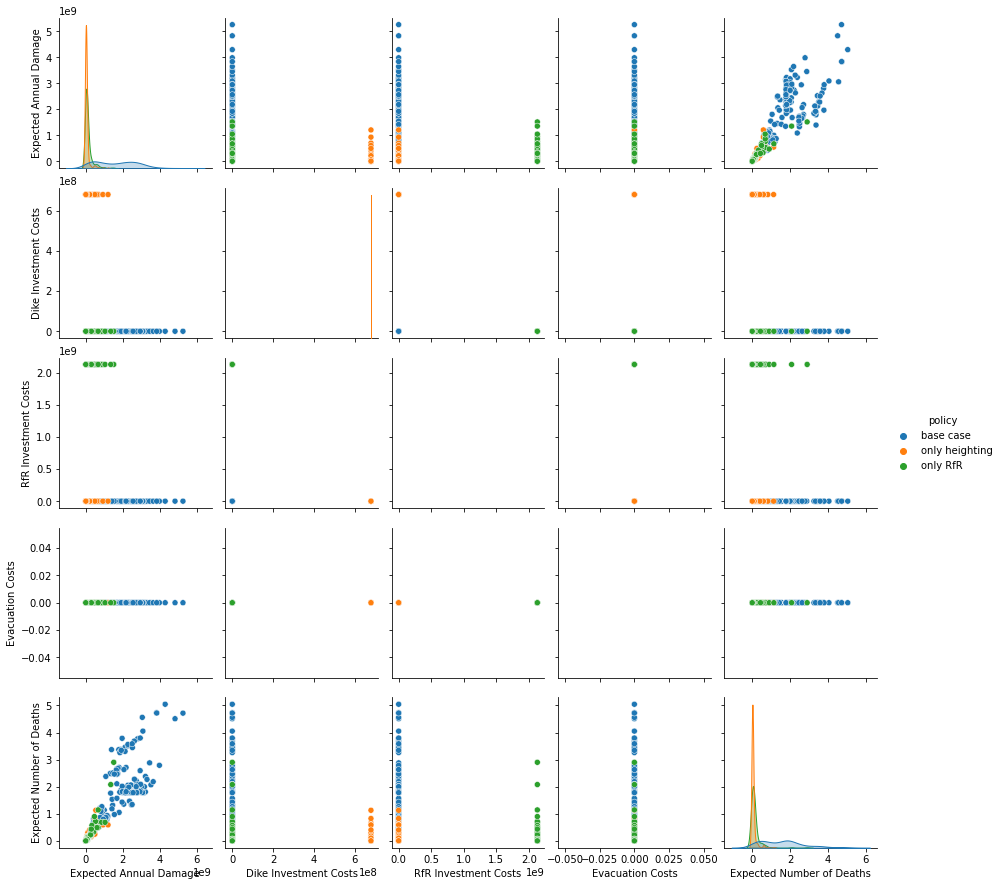

In [13]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
plot.savefig("open_exp_PF2.png")
plt.show()